<a href="https://colab.research.google.com/github/badrinarayanms/ml/blob/main/recourcealloc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('/content/datacomp.csv')

In [3]:
data.head(20)

,Name,Team,Skills,Interests,Experience,Past Contributions
0,Arjun Gupta,Tech,"JavaScript, Python, Web Development, AI","AI, Web Development",Advanced,Developed a chatbot for events
1,Sanya Rao,Tech,"Python, Machine Learning, Web Development","AI, Web Development",Intermediate,Worked on a recommendation system
2,Karthik Menon,Tech,"Java, React, Web Development, AI","AI, Web Development",Intermediate,Contributed to a social media app
3,Neha Sharma,Tech,"UI/UX Design, React, Web Development","Web Development, Design",Beginner,Designed landing pages for startup
4,Ravi Kumar,Tech,"JavaScript, HTML, CSS, Web Development",Web Development,Intermediate,Created responsive websites for clients
5,Priya Patel,Tech,"Node.js, JavaScript, Web Development, Machine ...","Web Development, Machine Learning",Advanced,Developed an e-commerce website backend
6,Rahul Verma,Tech,"Python, Data Analysis, Machine Learning, AI","AI, Machine Learning",Advanced,Worked on a deep learning model
7,Amit Yadav,Tech,"React, JavaScript, Web Development",Web Development,Intermediate,Built a personal blog with React
8,Divya Reddy,Creatives,"UI/UX Design, Content Writing, Design, Photogr...","Design, Photography",Beginner,Created user interfaces for mobile apps
9,Vishal Soni,Creatives,"Content Writing, UI/UX Design, Photography","Design, Content Writing",Intermediate,Designed brochures and social media content


In [4]:
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()

# Split skills and interests into lists

In [5]:
data['Skills'] = data['Skills'].apply(lambda x: x.split(', ') if x != '' else [])
data['Interests'] = data['Interests'].apply(lambda x: x.split(', ') if x != '' else [])

# Apply MultiLabelBinarizer to encode skills and interests into binary columns


In [6]:
skills_encoded = mlb_skills.fit_transform(data['Skills'])
interests_encoded = mlb_interests.fit_transform(data['Interests'])

# Convert the encoded skills and interests into DataFrames


In [7]:
skills_encoded = mlb_skills.fit_transform(data['Skills'])
interests_encoded = mlb_interests.fit_transform(data['Interests'])



#convert encoded array to df


In [8]:
skills_df = pd.DataFrame(skills_encoded, columns=mlb_skills.classes_)
interests_df = pd.DataFrame(interests_encoded, columns=mlb_interests.classes_)


In [9]:
skills_df = pd.DataFrame(skills_encoded, columns=[f"Skill_{col}" for col in mlb_skills.classes_])
interests_df = pd.DataFrame(interests_encoded, columns=[f"Interest_{col}" for col in mlb_interests.classes_])


In [10]:
le_experience = LabelEncoder()
data['Experience'] = le_experience.fit_transform(data['Experience'])

In [11]:
data_combined = pd.concat([data, skills_df, interests_df], axis=1)
data_combined.head()


,Name,Team,Skills,Interests,Experience,Past Contributions,Skill_AI,Skill_CSS,Skill_Communication,Skill_Content Writing,...,Interest_Content Writing,Interest_Design,Interest_Leadership,Interest_Machine Learning,Interest_Photography,Interest_Project Management,Interest_Public Speaking,Interest_Team Coordination,Interest_UI/UX Design,Interest_Web Development
0,Arjun Gupta,Tech,"[JavaScript, Python, Web Development, AI]","[AI, Web Development]",0,Developed a chatbot for events,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Sanya Rao,Tech,"[Python, Machine Learning, Web Development]","[AI, Web Development]",2,Worked on a recommendation system,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Karthik Menon,Tech,"[Java, React, Web Development, AI]","[AI, Web Development]",2,Contributed to a social media app,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Neha Sharma,Tech,"[UI/UX Design, React, Web Development]","[Web Development, Design]",1,Designed landing pages for startup,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Ravi Kumar,Tech,"[JavaScript, HTML, CSS, Web Development]",[Web Development],2,Created responsive websites for clients,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#copy of data

# Check for duplicate column names


In [12]:

print(data_combined.columns[data_combined.columns.duplicated()])


Index([], dtype='object')


In [13]:
data_combined.head()

,Name,Team,Skills,Interests,Experience,Past Contributions,Skill_AI,Skill_CSS,Skill_Communication,Skill_Content Writing,...,Interest_Content Writing,Interest_Design,Interest_Leadership,Interest_Machine Learning,Interest_Photography,Interest_Project Management,Interest_Public Speaking,Interest_Team Coordination,Interest_UI/UX Design,Interest_Web Development
0,Arjun Gupta,Tech,"[JavaScript, Python, Web Development, AI]","[AI, Web Development]",0,Developed a chatbot for events,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Sanya Rao,Tech,"[Python, Machine Learning, Web Development]","[AI, Web Development]",2,Worked on a recommendation system,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Karthik Menon,Tech,"[Java, React, Web Development, AI]","[AI, Web Development]",2,Contributed to a social media app,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Neha Sharma,Tech,"[UI/UX Design, React, Web Development]","[Web Development, Design]",1,Designed landing pages for startup,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Ravi Kumar,Tech,"[JavaScript, HTML, CSS, Web Development]",[Web Development],2,Created responsive websites for clients,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:

print(data_combined.columns[data_combined.columns.duplicated()])

Index([], dtype='object')


In [15]:
data_combined.isnull().sum()

,0
Name,0
Team,0
Skills,0
Interests,0
Experience,0
Past Contributions,0
Skill_AI,0
Skill_CSS,0
Skill_Communication,0
Skill_Content Writing,0


In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_combined.drop(columns=['Name', 'Team', 'Skills', 'Interests', 'Past Contributions', 'Experience']))

#test

In [17]:
kmeans = KMeans(n_clusters=15, random_state=42)  # Adjust the number of clusters as needed
data_combined['Cluster'] = kmeans.fit_predict(scaled_features)


In [18]:
print(data_combined[['Name', 'Cluster']])

             Name  Cluster
0     Arjun Gupta        4
1       Sanya Rao        4
2   Karthik Menon       11
3     Neha Sharma        2
4      Ravi Kumar        7
..            ...      ...
67   Arvind Kumar        2
68     Pooja Soni        1
69  Madhur Sharma        9
70  Shivani Verma       11
71  Pradeep Yadav        8

[72 rows x 2 columns]


In [19]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)


In [20]:
pc_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = data_combined['Cluster']

# Plot the clusters

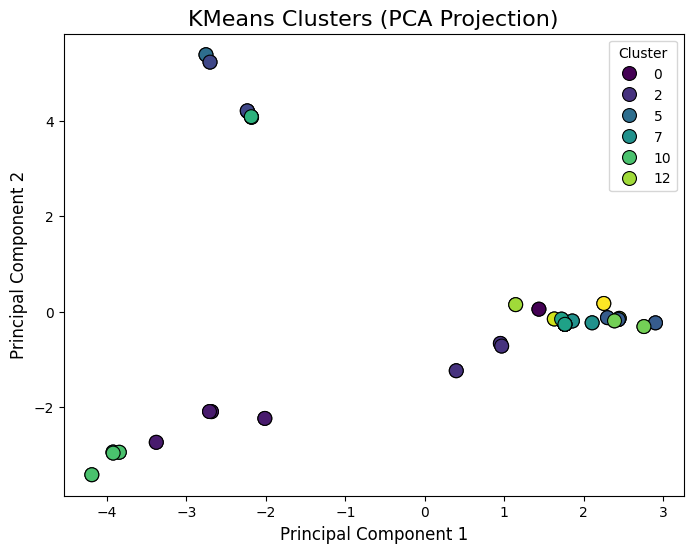

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

# 2. Visualizing distribution of Experience

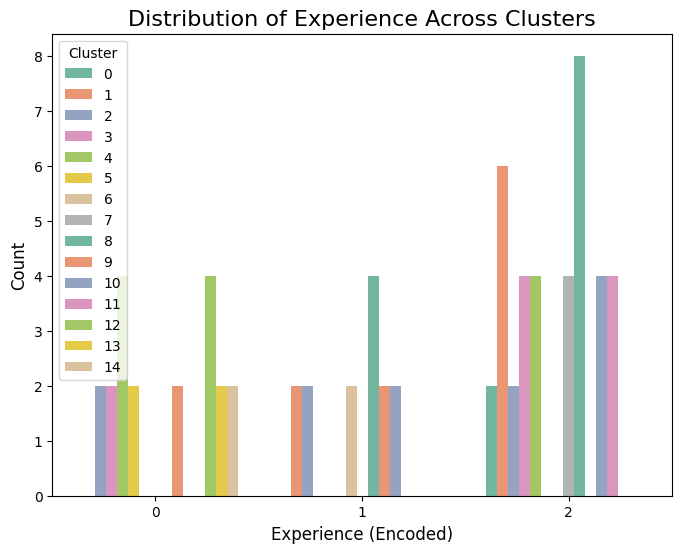

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_combined, x='Experience', hue='Cluster', palette='Set2')
plt.title('Distribution of Experience Across Clusters', fontsize=16)
plt.xlabel('Experience (Encoded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [23]:
def allocate_task(event_name, required_skills, required_interests, required_member_count):

    required_skills = mlb_skills.transform([required_skills])  # binary format
    required_interests = mlb_interests.transform([required_interests])


    required_features = np.hstack([required_skills, required_interests])

    # Scaleddata
    required_scaled = scaler.transform(required_features)


    cluster_label = kmeans.predict(required_scaled)

    # Get members in the predicted cluster
    suitable_members = data_combined[data_combined['Cluster'] == cluster_label[0]]

    # Get the count of suitable members
    suitable_members_count = len(suitable_members)

    # If there are enough suitable members, return the specified number of members
    if suitable_members_count >= required_member_count:
        suitable_members = suitable_members.head(required_member_count)
    else:
        print(f"Warning: Only {suitable_members_count} members available for the task.")

    return suitable_members[['Name', 'Skills', 'Interests']], suitable_members_count



# Example of user input for task allocation

In [24]:
event_name = "UI/UX Design Sprint"
required_skills = ['Figma', 'Adobe XD', 'Prototyping']
required_interests = ['Design', 'User Experience', 'Creativity']
required_member_count = 2

In [25]:
suitable_members, suitable_members_count = allocate_task(event_name, required_skills, required_interests, required_member_count)

print(f"Members suitable for the {event_name}:")
print(suitable_members)




Members suitable for the UI/UX Design Sprint:
            Name                                            Skills  \
9    Vishal Soni      [Content Writing, UI/UX Design, Photography]   
18  Aditi Tiwari  [UI/UX Design, Content Writing, Web Development]   

                    Interests  
9   [Design, Content Writing]  
18  [Design, Content Writing]  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['Adobe XD', 'Figma', 'Prototyping'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['Creativity', 'User Experience'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model Accuracy Evaluation

In [26]:

print("\n--- Model Accuracy Evaluation ---")
scaling_columns = [col for col in data_combined.columns
                   if col not in ['Name', 'Team', 'Skills', 'Interests', 'Past Contributions', 'Cluster', 'Experience']]

scaled_features = scaler.transform(data_combined[scaling_columns])


from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, data_combined['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")



--- Model Accuracy Evaluation ---
Silhouette Score: 0.56


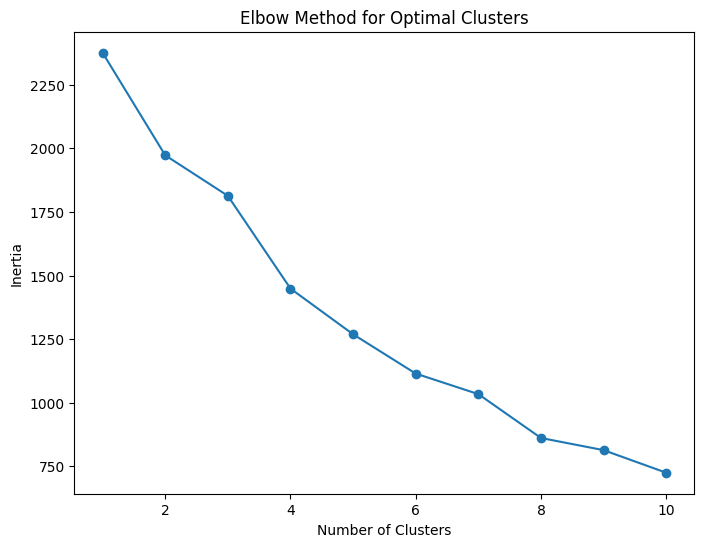

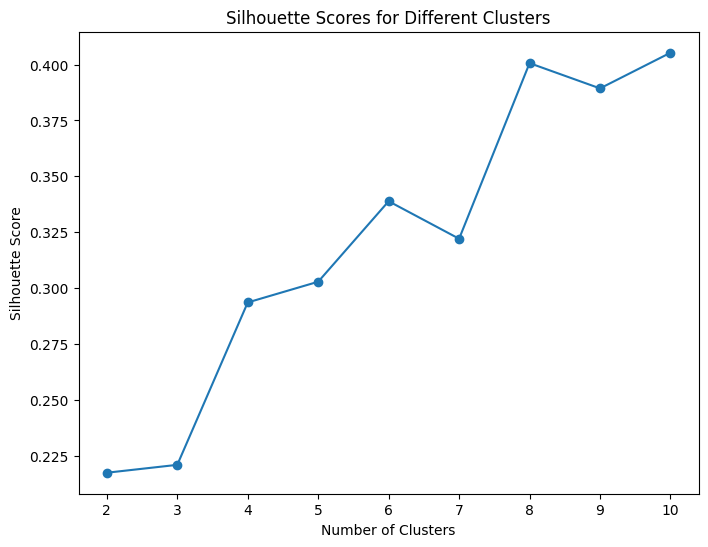

In [27]:
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score for different cluster numbers
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


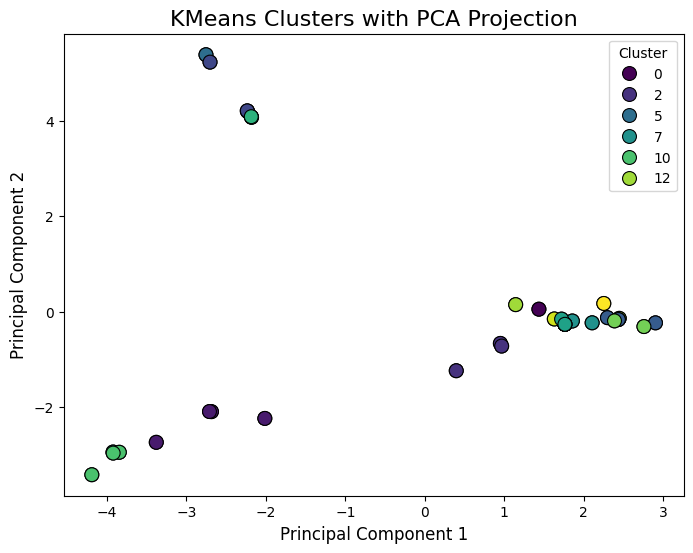

Silhouette Score after PCA: 0.27


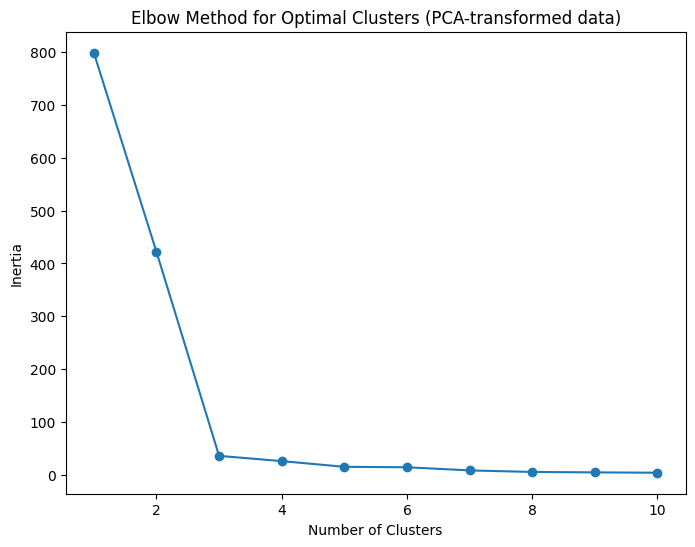

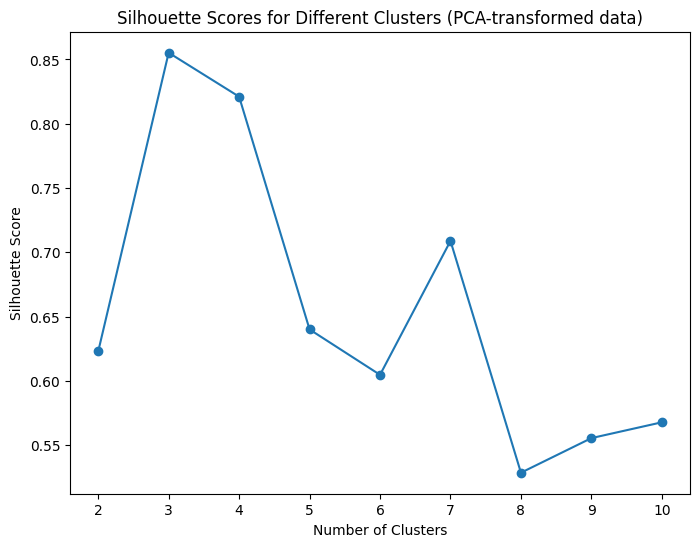

In [28]:


# apply PCA to the scaled features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_combined['Cluster']

# Visualize the clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters with PCA Projection', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


silhouette_avg = silhouette_score(principal_components, data_combined['Cluster'])
print(f"Silhouette Score after PCA: {silhouette_avg:.2f}")

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (PCA-transformed data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score for different cluster numbers after PCA
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    silhouette_scores.append(silhouette_score(principal_components, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters (PCA-transformed data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


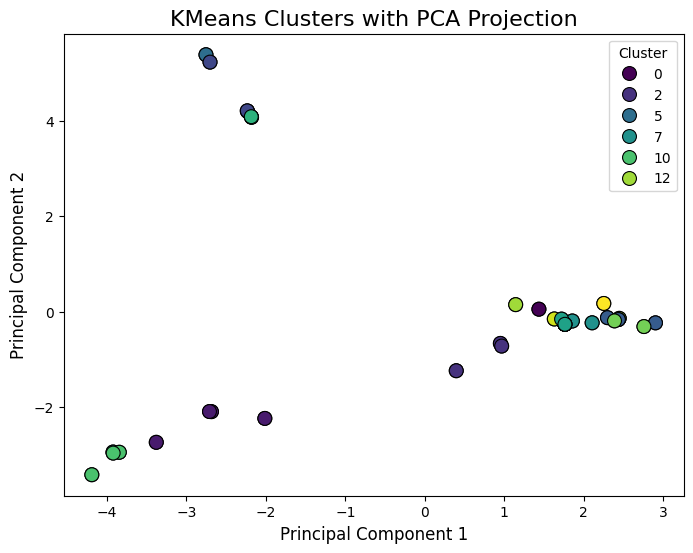

Silhouette Score after PCA: 0.86


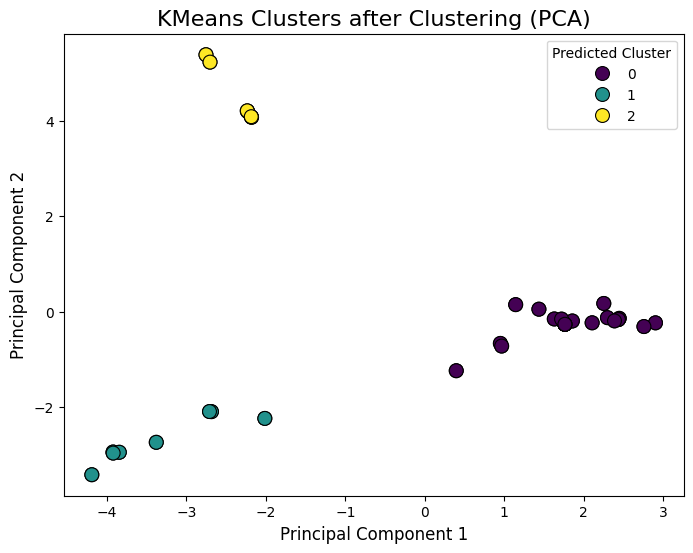

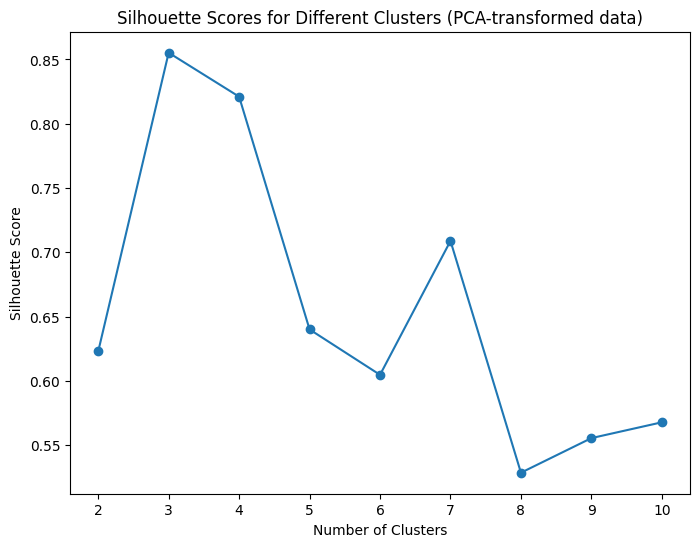

Allocated Members:             Name                                       Skills  \
0    Arjun Gupta    [JavaScript, Python, Web Development, AI]   
1      Sanya Rao  [Python, Machine Learning, Web Development]   
2  Karthik Menon           [Java, React, Web Development, AI]   

               Interests  
0  [AI, Web Development]  
1  [AI, Web Development]  
2  [AI, Web Development]  
Number of Allocated Members: 44


In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'scaled_features' is the scaled data that was pre-processed before

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame to store PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_combined['Cluster']  # Assuming original cluster labels in 'data_combined'

# Visualize the clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters with PCA Projection', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

# Step 1: Apply KMeans clustering on PCA-transformed data with 3 clusters (based on your choice)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)

# Step 2: Calculate silhouette score for this clustering
silhouette_avg = silhouette_score(principal_components, kmeans.labels_)
print(f"Silhouette Score after PCA: {silhouette_avg:.2f}")

# Step 3: Assign cluster labels to data
pca_df['Predicted_Cluster'] = kmeans.labels_

# Visualize the clusters after clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters after Clustering (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Predicted Cluster')
plt.show()

# Step 4: Check clustering performance (using silhouette scores for different k)
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(principal_components)
    silhouette_scores.append(silhouette_score(principal_components, kmeans_temp.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters (PCA-transformed data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 5: Output the predicted clusters
data_combined['Predicted_Cluster'] = kmeans.labels_

# You can now allocate tasks or assign members to tasks based on the cluster predictions.
# Example: selecting members for a task based on their predicted cluster label

# Sample function to allocate tasks to members based on their cluster
def allocate_task(event_name, required_skills, required_interests, required_member_count):
    # Assuming `data_combined` has been updated with the predicted clusters
    # We would use the required skills and interests to match clusters
    # This part depends on how your original data and features are structured

    # For example, if we are looking for members in Cluster 0:
    suitable_members = data_combined[data_combined['Predicted_Cluster'] == 0]
    suitable_members_count = len(suitable_members)

    # If there are enough suitable members, return the specified number of members
    if suitable_members_count >= required_member_count:
        suitable_members = suitable_members.head(required_member_count)
    else:
        print(f"Warning: Only {suitable_members_count} members available for the task.")

    return suitable_members[['Name', 'Skills', 'Interests']], suitable_members_count

# Example: allocate task with 3 members from cluster 0
allocated_members, count = allocate_task("Event X", ["Skill1", "Skill2"], ["Interest1"], 3)
print(f"Allocated Members: {allocated_members}")
print(f"Number of Allocated Members: {count}")


Silhouette Score after PCA: 0.86


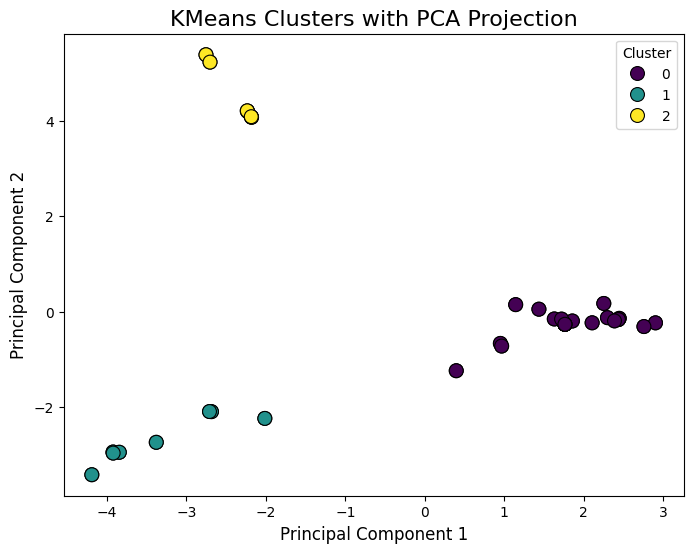

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Fit KMeans on the PCA-transformed data (assuming you chose 3 clusters after Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(principal_components, kmeans.labels_)
print(f"Silhouette Score after PCA: {silhouette_avg:.2f}")

# Visualize the clusters using PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters with PCA Projection', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()
